In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [2]:
fname = 'data/train/Data_S02_Sess01.csv'

In [3]:
df = pd.read_csv(fname)
df.head()

,Time,Fp1,Fp2,AF7,AF3,AF4,AF8,F7,F5,F3,...,P4,P6,P8,PO7,POz,P08,O1,O2,EOG,FeedBackEvent
0,0.000,509.630351,609.688545,522.032153,454.102593,309.486489,524.804335,484.333383,587.340998,469.651564,...,295.834834,485.530586,411.161892,448.726097,99.151239,613.529369,428.286969,378.933590,-906.668876,0
1,0.005,864.521388,1038.483761,917.023604,775.970207,576.123392,934.962455,833.427809,996.070640,823.715523,...,528.713692,894.541770,735.827300,780.487458,239.407648,1067.349342,782.319229,711.286079,-1484.107119,0
2,0.010,754.576625,904.117869,803.235608,678.039830,489.573235,803.064230,706.392172,868.996293,717.565698,...,459.066586,870.217213,691.971456,689.656321,255.876323,933.617965,679.366071,699.014004,-1313.435186,0
3,0.015,801.593761,957.870867,834.026569,716.254450,519.006819,860.058239,769.518284,921.777695,756.664761,...,487.899954,905.564172,723.595463,723.944898,247.990115,992.180045,713.405603,714.734949,-1391.966973,0
4,0.020,769.054899,920.060832,811.596932,692.750986,494.315305,817.206918,727.500302,892.004312,729.239924,...,464.032652,769.258159,642.962959,687.852792,179.835749,949.832471,680.906506,607.057329,-1347.494166,0


In [4]:
eeg_columns = list(df.columns)
print(eeg_columns)


['Time', 'Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'POz', 'P08', 'O1', 'O2', 'EOG', 'FeedBackEvent']


In [5]:
channels = []
for col in eeg_columns:
    if col != 'Time' and col != 'FeedBackEvent' and col != 'EOG':
        channels.append(col)

print(channels)
print(len(channels))




['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'POz', 'P08', 'O1', 'O2']
56


In [6]:
data = df[channels].values.T # Transpose the data matrix so that each row is a channel and each column is a time point
print(data.shape)


(56, 132001)


Creating RawArray with float64 data, n_channels=56, n_times=132001
    Range : 0 ... 132000 =      0.000 ...   220.000 secs
Ready.


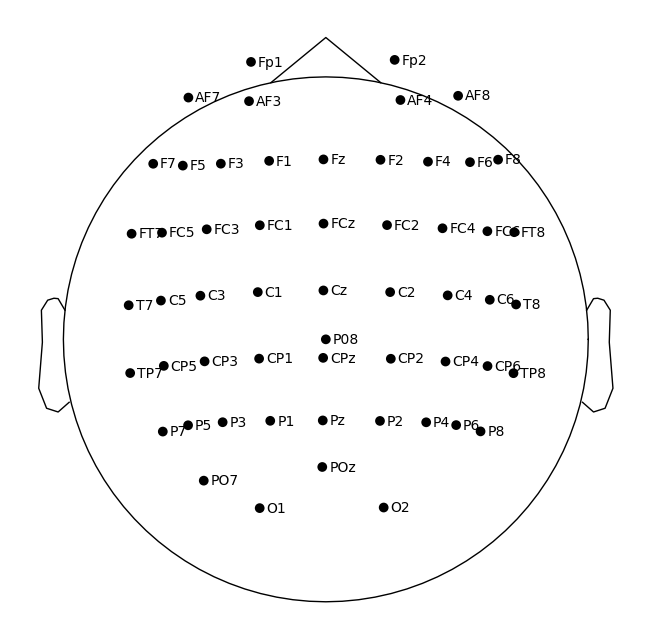

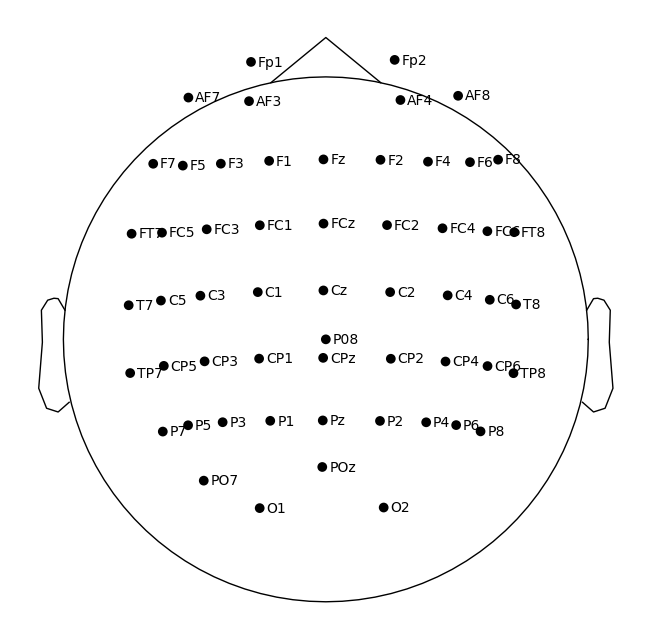

In [7]:
sampling_rate = 600 # Hz

info = mne.create_info(ch_names=channels, sfreq=sampling_rate, ch_types='eeg')
raw = mne.io.RawArray(data, info)

#montage = mne.channels.make_standard_montage('standard_1020')
#raw.set_montage(montage)


rename_channel_dict = {}

# Rename only the first 56 channels (your EEG channels)
for ix, ch in enumerate(raw.ch_names):
    if ix >= 56:
        break
    rename_channel_dict[ch] = ch.replace("EEG_", "")  # simpler & safer

# Apply the rename
raw.rename_channels(rename_channel_dict)

# Apply the standard 10–20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False, on_missing='ignore')

raw.plot_sensors(kind = 'topomap', ch_type = 'eeg', show_names = True)


In [8]:
ch_names = np.array(raw.ch_names)
ch_ix = len(ch_names) - 1 # max valid index
ch_names_ix_dict = {ch_names[i]: i for i in range(len(ch_names))}

print(ch_ix, ch_names_ix_dict)

55 {'Fp1': 0, 'Fp2': 1, 'AF7': 2, 'AF3': 3, 'AF4': 4, 'AF8': 5, 'F7': 6, 'F5': 7, 'F3': 8, 'F1': 9, 'Fz': 10, 'F2': 11, 'F4': 12, 'F6': 13, 'F8': 14, 'FT7': 15, 'FC5': 16, 'FC3': 17, 'FC1': 18, 'FCz': 19, 'FC2': 20, 'FC4': 21, 'FC6': 22, 'FT8': 23, 'T7': 24, 'C5': 25, 'C3': 26, 'C1': 27, 'Cz': 28, 'C2': 29, 'C4': 30, 'C6': 31, 'T8': 32, 'TP7': 33, 'CP5': 34, 'CP3': 35, 'CP1': 36, 'CPz': 37, 'CP2': 38, 'CP4': 39, 'CP6': 40, 'TP8': 41, 'P7': 42, 'P5': 43, 'P3': 44, 'P1': 45, 'Pz': 46, 'P2': 47, 'P4': 48, 'P6': 49, 'P8': 50, 'PO7': 51, 'POz': 52, 'P08': 53, 'O1': 54, 'O2': 55}


In [9]:

#Find the onsets (0 → 1 or 0 → 0 transitions)

#Use the value at that onset (0 = non-target, 1 = target)

feedbackevents = df['FeedBackEvent'].values # feedbackevents is the col 'feedbackevents' turned into an array using .values method

onset_index = np.where(np.diff(feedbackevents) == 1)[0] + 1 # the index num where feedbackevents[index] == 1, or in other words the index where the stimulus is triggered

print(len(onset_index))
print(onset_index)
print(len(feedbackevents))



60
[  9599  11172  12755  14332  15905  18389  19966  21542  23119  24699
  27792  29926  32063  34199  36333  39423  41556  43689  45823  47956
  51043  53176  55320  57456  59593  62130  63707  65283  66863  68440
  71530  73670  75810  77944  80080  82614  84187  85761  87334  88907
  91431  93004  94577  96151  97724 100244 101818 103391 104964 106538
 109588 111725 113865 116008 118145 121241 123375 125512 127648 129785]
132001


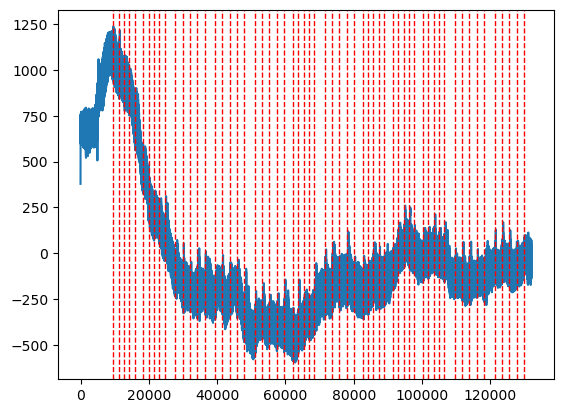

In [10]:
sensor_data = raw.get_data()
plt.plot(sensor_data[ch_ix, : ])
for onset in onset_index:
    plt.axvline(onset, color='red', linestyle='--', linewidth=1)

# plt.axvline(feedbackevents, color='red', linestyle='--')

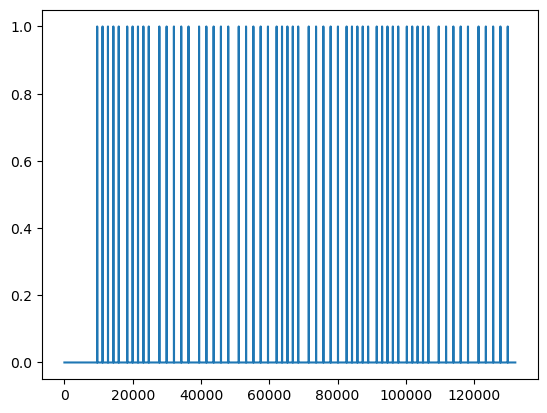

In [11]:
plt.plot(feedbackevents)

In [ ]:

epoch_window = (0, 600)

#Conv/rt milliseconds to samples:
# epoch_window[i] is in milliseconds (e.g., 600 ms).
# sampling_rate is how many samples per second (e.g., 600 samples/sec).
# Dividing by 1000 turns milliseconds into seconds.
# So this gives us how many EEG samples correspond to that time length.

start_sample = int(epoch_window[0] / 1000 * sampling_rate)
end_sample = int(epoch_window[1] / 1000 * sampling_rate)

print("Epoch sample range:", start_sample, "to", end_sample)

epochs = [] # will hold tritals, time, channels


for onset in onset_index:
    start = onset + start_sample
    end = onset + end_sample
    if end <= sensor_data.shape[1]:
        epochs.append(sensor_data[:, start:end])



Epoch sample range: 0 to 360


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
epochs = np.stack(epochs, axis=0)

print(epochs)
print("Epochs shape:", epochs.shape)


[[[ 8.30677222e+02  8.82209104e+02  8.38759996e+02 ...  9.91536302e+02
    9.32095376e+02  9.56361012e+02]
  [ 9.79638619e+02  1.03010790e+03  9.84945818e+02 ...  1.11774278e+03
    1.06568262e+03  1.08829096e+03]
  [ 8.47257758e+02  9.13807570e+02  8.48060414e+02 ...  1.02054911e+03
    9.41305069e+02  9.87098045e+02]
  ...
  [ 9.32304475e+02  1.00088501e+03  9.46093298e+02 ...  9.95086298e+02
    9.46779514e+02  9.75345161e+02]
  [ 7.50347476e+02  8.28234082e+02  7.54041038e+02 ...  8.38569744e+02
    7.69782851e+02  8.08024403e+02]
  [ 9.69756009e+02  1.15887329e+03  1.17158531e+03 ...  1.15186008e+03
    1.18943777e+03  1.07872541e+03]]

 [[ 7.41397327e+02  7.30714565e+02  7.42877888e+02 ...  1.08074835e+03
    1.10356003e+03  1.09452108e+03]
  [ 8.72008242e+02  8.54904491e+02  8.68267917e+02 ...  1.18422406e+03
    1.20548331e+03  1.19862132e+03]
  [ 7.66300141e+02  7.50046800e+02  7.70705164e+02 ...  1.07022257e+03
    1.08491063e+03  1.08319531e+03]
  ...
  [ 8.35169209e+02  7.9

In [ ]:
target_mask = feedbackevents == 1
nontarget_mask = feedbackevents == 0
target_epoches = epochs[target_mask]
nontarget_epoches = epoches[nontarget_epoches]
#target_epochs = epochs[t]

target_epochs = (np.where(stim_type[stim_onsets] == 1))[0].tolist()
print('Number of Targets:', len(target_epochs))
non_target_epochs = (np.where(stim_type[stim_onsets] == 0))[0].tolist()
print('Number of Non-Targets:', len(non_target_epochs))


array([False, False, False, ..., False, False, False])